In [53]:
from plotly.offline import iplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import pandas as pd
import numpy as np
from os import walk
from tqdm.auto import tqdm
from datetime import datetime
import seaborn as sn
from sklearn.cluster import KMeans

In [54]:
train_df = pd.read_csv("./aggregated_data/labeled_5s_candles.csv")
train_df.drop(["Unnamed: 0"], axis=1, inplace=True)
train_df.dropna(inplace=True)
train_df

,timestamp,open,high,low,close,volume,score
12,2021-02-27 15:08:55,1483.68,1483.92,1483.56,1483.56,8.40117,-0.956559
13,2021-02-27 15:09:00,1483.27,1483.28,1483.11,1483.11,1.92292,-1.064994
14,2021-02-27 15:09:05,1482.49,1482.49,1482.16,1482.19,3.57305,-1.053513
15,2021-02-27 15:09:10,1482.36,1482.73,1482.22,1482.73,2.02586,-0.954966
16,2021-02-27 15:09:15,1482.60,1483.39,1482.51,1483.39,1.71675,-0.859152
...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,1530.01,1530.49,1530.00,1530.49,15.21124,-0.521830
34319,2021-03-01 14:26:05,1530.42,1530.42,1530.01,1530.08,3.90970,-0.378777
34320,2021-03-01 14:26:10,1530.00,1530.25,1530.00,1530.25,11.90400,-0.241758
34321,2021-03-01 14:26:15,1530.56,1531.35,1530.56,1531.35,2.72905,-0.114336


In order to find right K, I used the elbow method.

In [55]:
from tqdm.auto import tqdm

distortions = []

K = range(1,12)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(train_df[['score']])
    distortions.append(kmeanModel.inertia_)

  0%|          | 0/11 [00:00<?, ?it/s]

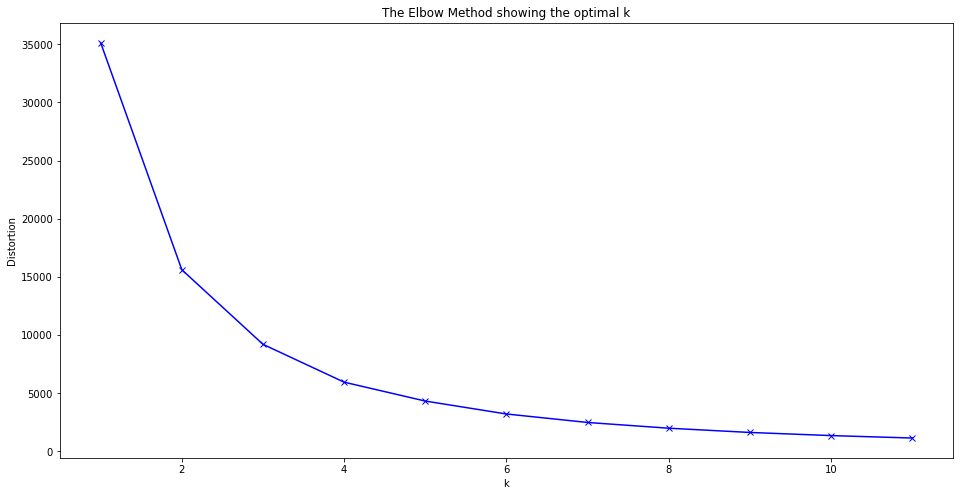

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [57]:
kmeans = KMeans(algorithm='auto', init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.001, verbose=0)

train_df["class"]  = kmeans.fit_predict(train_df[['score']])

heights = train_df["class"].value_counts()/len(train_df["class"])
print(heights)
train_df["percs"] = train_df["class"].map(heights.to_dict())
train_df

/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:788: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect

/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



0    0.366734
4    0.280260
1    0.230276
2    0.070706
3    0.052024
Name: class, dtype: float64


,timestamp,open,high,low,close,volume,score,class,percs
12,2021-02-27 15:08:55,1483.68,1483.92,1483.56,1483.56,8.40117,-0.956559,4,0.280260
13,2021-02-27 15:09:00,1483.27,1483.28,1483.11,1483.11,1.92292,-1.064994,4,0.280260
14,2021-02-27 15:09:05,1482.49,1482.49,1482.16,1482.19,3.57305,-1.053513,4,0.280260
15,2021-02-27 15:09:10,1482.36,1482.73,1482.22,1482.73,2.02586,-0.954966,4,0.280260
16,2021-02-27 15:09:15,1482.60,1483.39,1482.51,1483.39,1.71675,-0.859152,4,0.280260
...,...,...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,1530.01,1530.49,1530.00,1530.49,15.21124,-0.521830,4,0.280260
34319,2021-03-01 14:26:05,1530.42,1530.42,1530.01,1530.08,3.90970,-0.378777,4,0.280260
34320,2021-03-01 14:26:10,1530.00,1530.25,1530.00,1530.25,11.90400,-0.241758,0,0.366734
34321,2021-03-01 14:26:15,1530.56,1531.35,1530.56,1531.35,2.72905,-0.114336,0,0.366734


Text(0.5, 0, 'Score values')

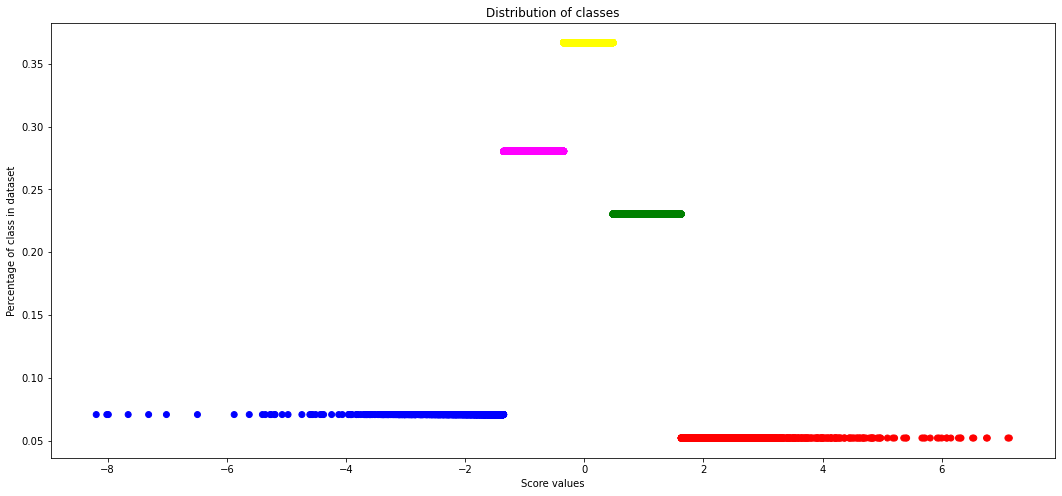

In [58]:
import numpy as np
import matplotlib.pyplot as pp
import matplotlib

ar = train_df["score"].values
y = train_df["percs"].values
label = train_df["class"].values

colors = ['yellow','green','blue', "red", "magenta"]

plt.figure(figsize=(18,8))
plt.scatter(ar, y + 0., c=label,cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Distribution of classes')
plt.ylabel('Percentage of class in dataset')
plt.xlabel('Score values')

###### It is clear that the values are broken down into 5 well-separable clusters. In order to have a clear idea of which models gave what estimates in subsequent teachings and evaluations, it is important to standardize labeling as well.
##### 0: Strong fall 
##### 1: Weak falling
##### 2: Stagnant
##### 3: Weak rising 
##### 4: Strong rising 

In [59]:
def relabel_df(train_df):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    train_df["class"] = train_df["class"].map(relabel_dict)
    
def relabel_prediction(array):
    relabel_dict = {
        1:3,
        4:1,
        2:0,
        3:4,
        0:2
    }
    return np.vectorize(relabel_dict.get)(array)

2    0.366734
1    0.280260
3    0.230276
0    0.070706
4    0.052024
Name: class, dtype: float64


Text(0.5, 0, 'Score values')

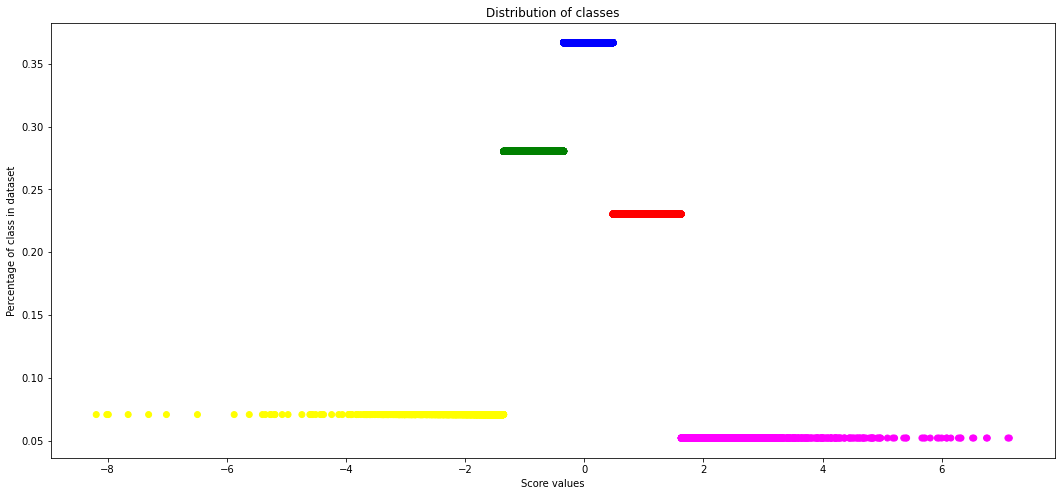

In [60]:
relabel_df(train_df)
heights = train_df["class"].value_counts()/len(train_df["class"])
print(heights)
ar = train_df["score"].values
y = train_df["percs"].values
label = train_df["class"].values

colors = ['yellow','green','blue', "red", "magenta"]

plt.figure(figsize=(18,8))
plt.scatter(ar, y + 0., c=label,cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Distribution of classes')
plt.ylabel('Percentage of class in dataset')
plt.xlabel('Score values')

## Simple models

### Linear Extrapolation

Through a simpler approach, I tried to give an approximation of what baseline accuracy we can expect. Using linear extrapolation and using the default indicator values, I tried to determine the shifted and corrected values, which I then classified into the appropriate class using the K-means algorithm defined above.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [62]:
bl_model_df = train_df.copy()

o, h, l, c = np.array(bl_model_df.open.values), np.array(bl_model_df.high.values), np.array(bl_model_df.low.values),\
    np.array(bl_model_df.close.values)

ha_close = (o + h + l + c) / 4
ha_open = np.array([])

oc_pair = np.dstack((o,c))[0]

for idx in tqdm(range(len(oc_pair))):
    if idx != 0:
        ha_open = np.append(ha_open, (oc_pair[idx-1][0]+oc_pair[idx-1][1])/2)
    else:
        ha_open = np.append(ha_open, (oc_pair[idx][0]+oc_pair[idx][1])/2)
        
ha_high, ha_low = [np.array([])]*2

vals = np.dstack((h, ha_open, ha_close))[0]

for val in tqdm(vals):
    ha_high = np.append(ha_high, max(val))
    ha_low = np.append(ha_low, min(val))
    
bl_model_df["ha_open"] = ha_open
bl_model_df["ha_high"] = ha_high
bl_model_df["ha_low"] = ha_low
bl_model_df["ha_close"] = ha_close

#baseline smoothed heikin ashi
bl_model_df['ha_open'] = bl_model_df['ha_open'].rolling(8).mean()
bl_model_df['ha_close'] = bl_model_df['ha_close'].rolling(8).mean()

# bl_model_df['ha_open'] = s_moving_average(bl_model_df['ha_open'].values)
# bl_model_df['ha_close'] = s_moving_average(bl_model_df['ha_close'].values)

bl_model_df.drop(["open", "high", "low", "close", "ha_high", "ha_low", "volume"], axis=1, inplace=True)
bl_model_df.dropna(inplace=True)

bl_model_df

  0%|          | 0/34311 [00:00<?, ?it/s]

  0%|          | 0/34311 [00:00<?, ?it/s]

,timestamp,score,class,percs,ha_open,ha_close
19,2021-02-27 15:09:30,-0.571630,1,0.280260,1483.311250,1483.276250
20,2021-02-27 15:09:35,-0.485163,1,0.280260,1483.283750,1483.208125
21,2021-02-27 15:09:40,-0.413778,1,0.280260,1483.221250,1483.134688
22,2021-02-27 15:09:45,-0.328834,2,0.366734,1483.148125,1483.090938
23,2021-02-27 15:09:50,-0.326296,2,0.366734,1483.103750,1483.038750
...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,-0.521830,1,0.280260,1530.672500,1530.510625
34319,2021-03-01 14:26:05,-0.378777,1,0.280260,1530.515625,1530.423437
34320,2021-03-01 14:26:10,-0.241758,2,0.366734,1530.430625,1530.400938
34321,2021-03-01 14:26:15,-0.114336,2,0.366734,1530.408125,1530.495312


In [63]:
bl_score_arr = np.array([])

opns, clss = np.array(bl_model_df['ha_open'].values), np.array(bl_model_df['ha_close'].values)

for i in tqdm(range(12, len(opns))):
    sub_opn = opns[i-12:i]
    sub_cls = clss[i-12:i]
    
    new_arr = np.array([])
    
    for v in np.dstack((sub_opn, sub_cls))[0]:
        new_arr = np.append(new_arr, (v[1]/v[0])-1)
        
    val = np.sum([score*(idx+1)/12 for idx, score in enumerate(new_arr)])*1000 #csak konstans díszétésnek
    bl_score_arr = np.append(bl_score_arr, val)
    
firsts = np.empty(12)
firsts[:] = np.nan

bl_model_df["bl_score"] = np.append(firsts, bl_score_arr)
bl_model_df["bl_score"] = bl_model_df["bl_score"].fillna(0)
bl_model_df

  0%|          | 0/34292 [00:00<?, ?it/s]

,timestamp,score,class,percs,ha_open,ha_close,bl_score
19,2021-02-27 15:09:30,-0.571630,1,0.280260,1483.311250,1483.276250,0.000000
20,2021-02-27 15:09:35,-0.485163,1,0.280260,1483.283750,1483.208125,0.000000
21,2021-02-27 15:09:40,-0.413778,1,0.280260,1483.221250,1483.134688,0.000000
22,2021-02-27 15:09:45,-0.328834,2,0.366734,1483.148125,1483.090938,0.000000
23,2021-02-27 15:09:50,-0.326296,2,0.366734,1483.103750,1483.038750,0.000000
...,...,...,...,...,...,...,...
34318,2021-03-01 14:26:00,-0.521830,1,0.280260,1530.672500,1530.510625,-0.615583
34319,2021-03-01 14:26:05,-0.378777,1,0.280260,1530.515625,1530.423437,-0.628239
34320,2021-03-01 14:26:10,-0.241758,2,0.366734,1530.430625,1530.400938,-0.593799
34321,2021-03-01 14:26:15,-0.114336,2,0.366734,1530.408125,1530.495312,-0.521830


In [64]:
linintr_train_df = bl_model_df[["score", "bl_score"]]
linintr_train_df.rename(columns={"bl_score": "real_time_score"}, inplace=True)
linintr_train_df = linintr_train_df.iloc[12:]

params = np.array(linintr_train_df["real_time_score"].values)
all_arr = list()
for i in tqdm(range(12, len(params))):
    all_arr.append(params[i-12:i])
    
# random shuffle
import random
from sklearn.model_selection import train_test_split

X = np.array(all_arr)

y = np.array(linintr_train_df["score"].values[12:])

random.seed(42)

concat = list(zip(X,y))
random.shuffle(concat)

x, y = zip(*concat)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

/home/arathus/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



  0%|          | 0/34280 [00:00<?, ?it/s]

Overall accuracy:  0.7462077012835473 

class 0 accuracy: 64.0496 %
class 1 accuracy: 74.7854 %
class 2 accuracy: 78.3846 %
class 3 accuracy: 74.1268 %
class 4 accuracy: 62.9834 %


<AxesSubplot:>

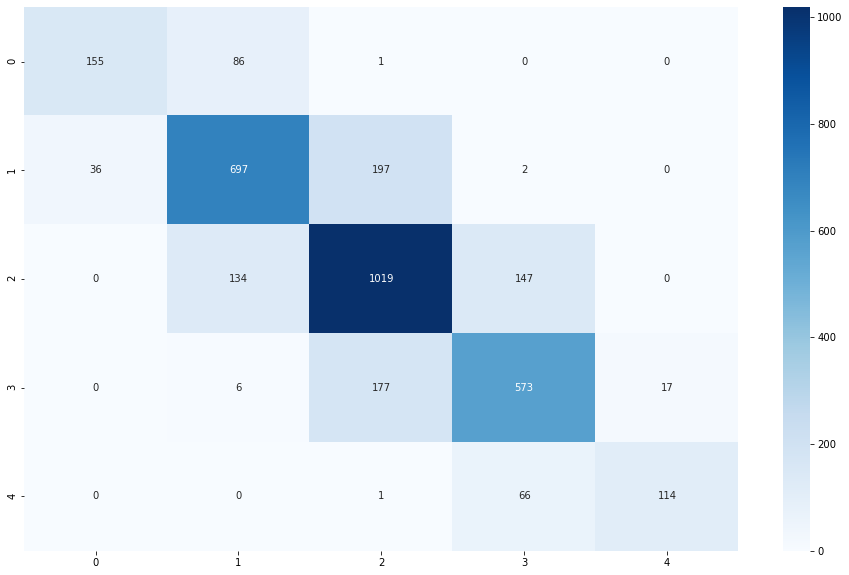

In [66]:
from sklearn.metrics import accuracy_score

reg = LinearRegression().fit(X_train, y_train)

pred_classes = relabel_prediction(kmeans.predict(reg.predict(X_test).reshape(-1,1)))

real_classes = relabel_prediction(kmeans.predict(y_test.reshape(-1,1)))

print("Overall accuracy: ",
      accuracy_score(real_classes, pred_classes), "\n")

matrix = confusion_matrix(real_classes, pred_classes)

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

### Multinomial Logistic Regression

In [67]:
y_train = kmeans.predict(y_train.reshape(-1,1))
y_test = kmeans.predict(y_test.reshape(-1,1))

Overall accuracy:  0.7149941656942824 

class 0 accuracy: 54.5455 %
class 1 accuracy: 73.9270 %
class 2 accuracy: 77.1538 %
class 3 accuracy: 68.0466 %
class 4 accuracy: 55.8011 %


/home/arathus/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<AxesSubplot:>

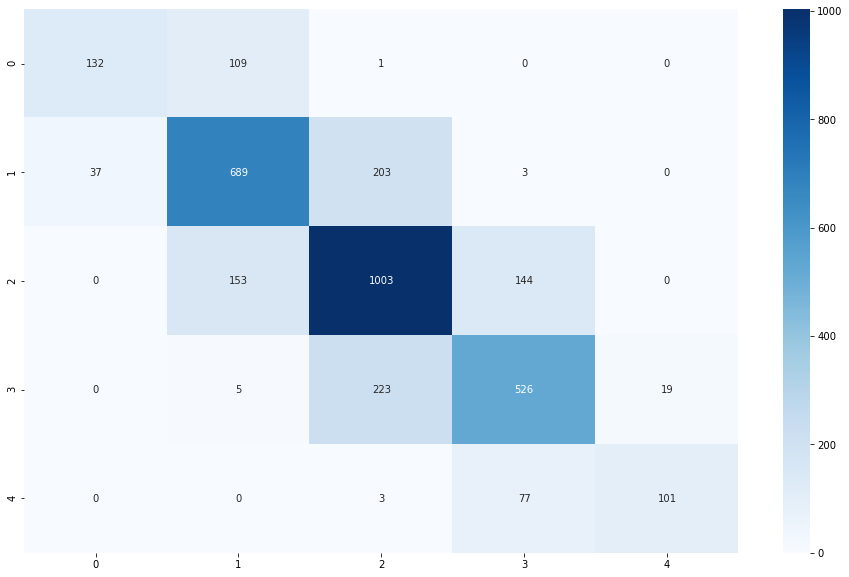

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.6)
model.fit(X_train, y_train)
pred_classes = relabel_prediction(model.predict_proba(X_test).argmax(axis=1))
real_classes = relabel_prediction(np.copy(y_test))

print("Overall accuracy: ",
      accuracy_score(real_classes, pred_classes), "\n")

matrix = confusion_matrix(relabel_prediction(y_test), pred_classes)

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])

plt.figure(figsize = (16,10))

sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

## Deep Learning

### Deep Learning LSTM with OHLC (+ Volume)

As a preprocessing of the Deep Learning approach, it regularized the OHLC values by window size 13 and divided the other 12 by the first element of the window. In this way, we can get a good sense of what movements have developed within the given period.

In [70]:
dl_train1 = train_df.copy()

params = np.array(dl_train1.drop(["score", "timestamp", "class", "percs"], axis=1).values)
all_arr = list()
for i in tqdm(range(13, len(params))):
    all_arr.append((params[i-12:i]/params[i-13])-1)
    
x = np.array(all_arr)

_y = np.array(dl_train1[["class"]].values)

y = _y

x = x
y = y[13:]

print(np.shape(x))
print(np.shape(y))

  0%|          | 0/34298 [00:00<?, ?it/s]

(34298, 12, 5)
(34298, 1)


In [71]:
# random shuffle
import random
from sklearn.model_selection import train_test_split

random.seed(42)

concat = list(zip(x,y))
random.shuffle(concat)

x, y = zip(*concat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

## one-hot encoding
a = y_train.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b

a = y_test.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b

In [51]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
import tensorflow.keras as keras

r = 0
T = 12
D = 5

model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (T,D)))
model.add(Dropout(0.25))
model.add(LSTM(units = 59))
model.add(Dropout(0.18))
model.add(Dense(units = 30))
model.add(Dropout(0.1))
model.add(Dense(units = 17))
model.add(Dense(units = 5, activation='softmax'))

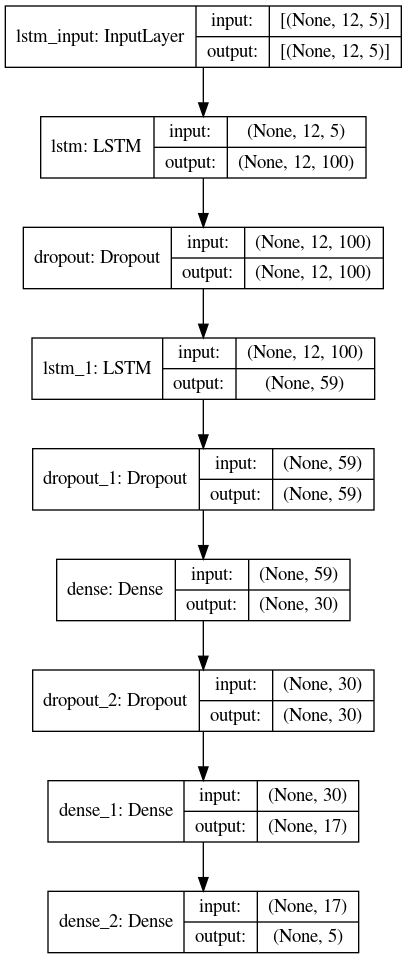

In [37]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="./images/simple_lstm_12.png", show_shapes=True)

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_filepath = './tmp/simple_lstm_12'
model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

cutpoint = -int(len(X_train)*0.2)

r = model.fit(X_train[:cutpoint], y_train[:cutpoint],
              validation_data=(X_test[cutpoint:], y_test[cutpoint:]), 
              epochs = 30, batch_size = 100, 
              callbacks=[model_checkpoint_callback])

model.load_weights(checkpoint_filepath)
model.save('./models/simple_lstm_12')

Epoch 1/30
247/247 [==============================] - 81s 267ms/step - loss: 1.4539 - accuracy: 0.3433 - val_loss: 1.3964 - val_accuracy: 0.3787
Epoch 2/30
247/247 [==============================] - 64s 257ms/step - loss: 1.4017 - accuracy: 0.3693 - val_loss: 1.3259 - val_accuracy: 0.3950
Epoch 3/30
247/247 [==============================] - 60s 242ms/step - loss: 1.2360 - accuracy: 0.4398 - val_loss: 0.7873 - val_accuracy: 0.6636
Epoch 4/30
247/247 [==============================] - 61s 246ms/step - loss: 0.7880 - accuracy: 0.6573 - val_loss: 0.6286 - val_accuracy: 0.7382
Epoch 5/30
247/247 [==============================] - 59s 238ms/step - loss: 0.6849 - accuracy: 0.7043 - val_loss: 0.6000 - val_accuracy: 0.7461
Epoch 6/30
247/247 [==============================] - 61s 247ms/step - loss: 0.6307 - accuracy: 0.7307 - val_loss: 0.5667 - val_accuracy: 0.7507
Epoch 7/30
247/247 [==============================] - 58s 236ms/step - loss: 0.5988 - accuracy: 0.7435 - val_loss: 0.5320 - val_ac

INFO:tensorflow:Assets written to: ./models/simple_lstm_12/assets


INFO:tensorflow:Assets written to: ./models/simple_lstm_12/assets


Overall accuracy:  0.8224489795918367 

class 0 accuracy: 74.0260 %
class 1 accuracy: 83.0149 %
class 2 accuracy: 85.2194 %
class 3 accuracy: 80.4124 %
class 4 accuracy: 75.2747 %


<AxesSubplot:>

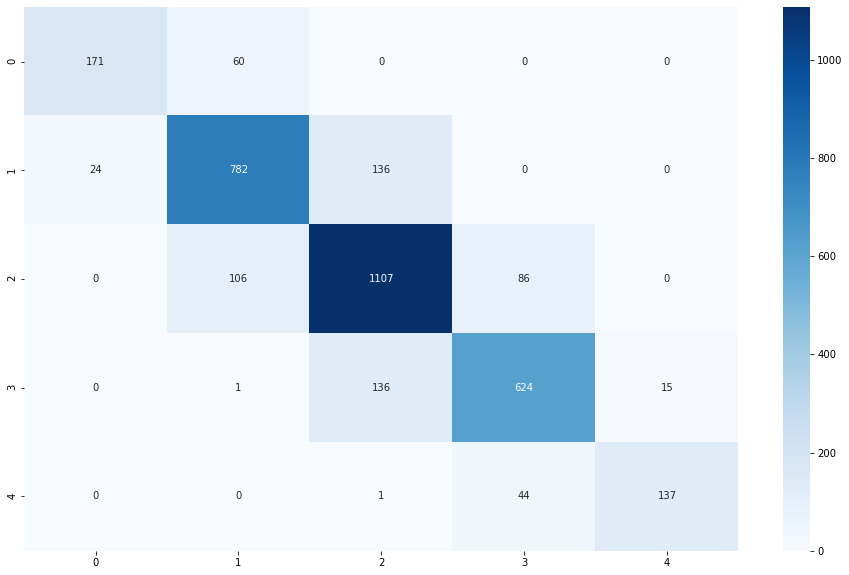

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras

model = keras.models.load_model('./models/simple_lstm_12')

y_pred1 = model.predict(X_test)
print("Overall accuracy: ",
      accuracy_score(relabel_prediction(y_test.argmax(axis=1)), relabel_prediction(y_pred1.argmax(axis=1))), "\n")

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(axis=1))

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

### Deep Learning LSTM with OHLC (+ Volume) and Trades info

Compared to the above OHLC data, I also provided additional information to the network by importing Trade data. What change had to be made for more effective teaching was that the Sentiment Weighted Average had to be divided into two columns: the value of sentiment (0, -1), and the value of price; all in order for the previous windowsize regulation of 13 to work properly.

In [74]:
dl_train2 = train_df.copy()

trades_df = pd.read_csv("./aggregated_data/5s_trades_all.csv")
trades_df.drop(["Unnamed: 0"], axis=1, inplace=True)

dl_train2 = pd.merge(dl_train2, trades_df, on="timestamp")

dl_train2["sentiment"] = \
(dl_train2["sentiment_weighted_avg_price"]>=1).astype(int).replace(0, -1)

dl_train2["sentiment_weighted_avg_price"] = np.abs(dl_train2["sentiment_weighted_avg_price"])

def windowed_value(wind_13):
    first = wind_13[0][:-1]
    whole =  wind_13[1:,:-1]
    side_values = np.array([i[-1] for i in wind_13])[1:]
    regularized = (whole/first)-1
    return np.hstack((regularized, side_values.reshape(-1,1)))


params = np.array(dl_train2.drop(["score", "timestamp", "class", "percs"], axis=1).values)
all_arr = list()
for i in tqdm(range(13, len(params))):
    all_arr.append(windowed_value(params[i-13:i]))

x = np.array(all_arr)

_y = np.array(dl_train2[["class"]].values)

y = _y

x = x
y = y[13:]

print(np.shape(x))
print(np.shape(y))

  0%|          | 0/34620 [00:00<?, ?it/s]

(34620, 12, 9)
(34620, 1)


In [75]:
# random shuffle
import random
from sklearn.model_selection import train_test_split

random.seed(42)

concat = list(zip(x,y))
random.shuffle(concat)

x, y = zip(*concat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

## one-hot encoding
a = y_train.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_train = b

a = y_test.reshape(-1)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
y_test = b

In [42]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
import tensorflow.keras as keras

r = 0
T = 12
D = 9

model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (T,D)))
model.add(Dropout(0.25))
model.add(LSTM(units = 59))
model.add(Dropout(0.18))
model.add(Dense(units = 30))
model.add(Dropout(0.1))
model.add(Dense(units = 17))
model.add(Dense(units = 5, activation='softmax'))

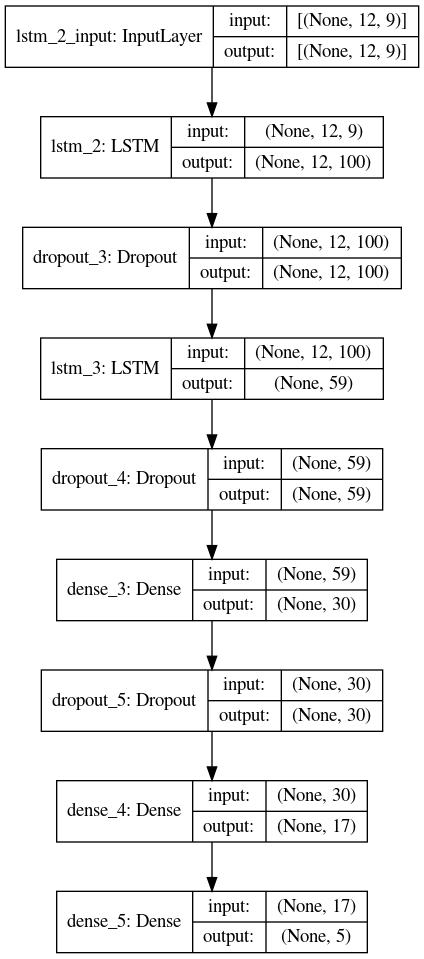

In [43]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="./images/simple_lstm_with_trades_12.png", show_shapes=True)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# opt = RMSprop(learning_rate=0.005, momentum=0.9, clipnorm=1.0)
# model.compile(optimizer = opt, loss = 'mean_squared_error')# Fitting the RNN to the Training set

checkpoint_filepath = './tmp/simple_lstm_with_trades_12'
model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only = True,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True)

cutpoint = -int(len(X_train)*0.2)

r = model.fit(X_train[:cutpoint], y_train[:cutpoint],
              validation_data=(X_test[cutpoint:], y_test[cutpoint:]), 
              epochs = 30, batch_size = 100, 
              callbacks=[model_checkpoint_callback])

model.load_weights(checkpoint_filepath)
model.save('./models/simple_lstm_with_trades_12')

Epoch 1/30
250/250 [==============================] - 83s 268ms/step - loss: 1.4428 - accuracy: 0.3403 - val_loss: 1.3776 - val_accuracy: 0.3746
Epoch 2/30
250/250 [==============================] - 49s 196ms/step - loss: 1.3805 - accuracy: 0.3729 - val_loss: 1.3497 - val_accuracy: 0.3798
Epoch 3/30
250/250 [==============================] - 47s 187ms/step - loss: 1.3368 - accuracy: 0.3852 - val_loss: 1.1221 - val_accuracy: 0.5075
Epoch 4/30
250/250 [==============================] - 49s 196ms/step - loss: 1.0750 - accuracy: 0.5189 - val_loss: 0.8142 - val_accuracy: 0.6505
Epoch 5/30
250/250 [==============================] - 49s 194ms/step - loss: 0.8217 - accuracy: 0.6406 - val_loss: 0.6802 - val_accuracy: 0.7117
Epoch 6/30
250/250 [==============================] - 50s 199ms/step - loss: 0.7370 - accuracy: 0.6791 - val_loss: 0.6625 - val_accuracy: 0.7100
Epoch 7/30
250/250 [==============================] - 48s 190ms/step - loss: 0.6603 - accuracy: 0.7154 - val_loss: 0.6033 - val_ac

INFO:tensorflow:Assets written to: ./models/simple_lstm_with_trades_12/assets


INFO:tensorflow:Assets written to: ./models/simple_lstm_with_trades_12/assets


Overall accuracy:  0.8093587521663779 

class 0 accuracy: 77.3504 %
class 1 accuracy: 77.1072 %
class 2 accuracy: 85.6138 %
class 3 accuracy: 81.3896 %
class 4 accuracy: 70.8791 %


<AxesSubplot:>

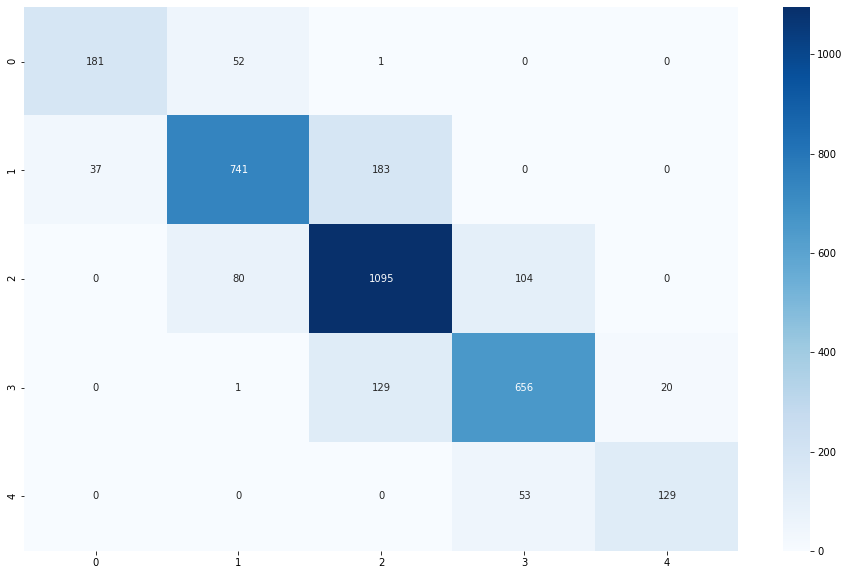

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras

model = keras.models.load_model('./models/simple_lstm_with_trades_12')

y_pred_2 = model.predict(X_test)
print("Overall accuracy: ",
      accuracy_score(relabel_prediction(y_test.argmax(axis=1)), relabel_prediction(y_pred_2.argmax(axis=1))), "\n")

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_2.argmax(axis=1))

class_percentages = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
for idx, pct in enumerate(class_percentages.diagonal()):
    print(f"class {idx} accuracy:", "{:.4f} %".format(pct*100))

df_cm = pd.DataFrame(matrix, index = [str(i) for i in range(5)],
                  columns = [str(i) for i in range(5)])
plt.figure(figsize = (16,10))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')